# Rozbuduj sieć konwolucyjną z projektu 6 do autokodera, poprzez dodanie symetrycznych warstw *Conv2DTranspose*. Przystosuj sieć do wykorzystania danych mnist (Ręcznie pisane cyfry) oraz by wyjście z encodera, oraz wejście dekodara było 10 elementową tablicą w której jedna wartość jest równa 1 a pozostąłe 0.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


7


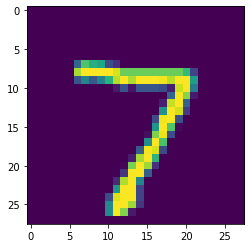

2


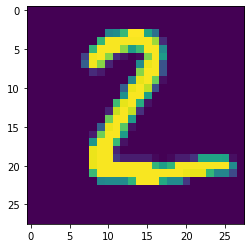

1


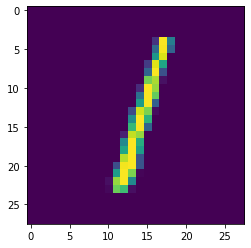

0


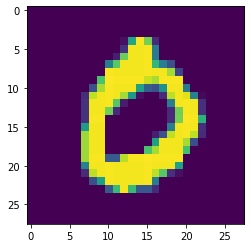

4


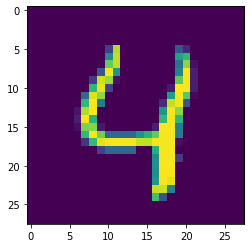

1


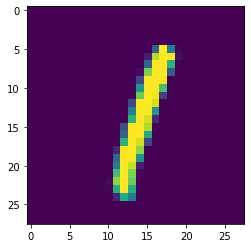

4


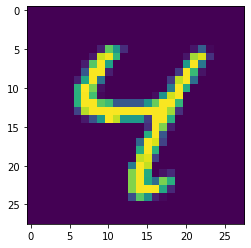

9


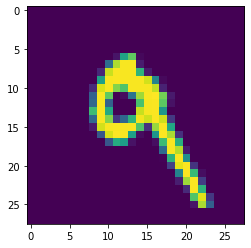

5


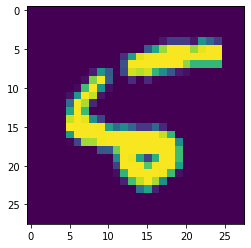

9


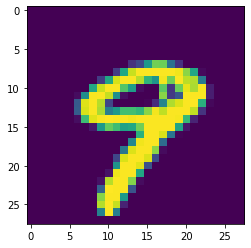

0


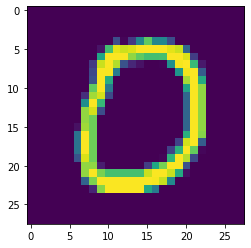

6


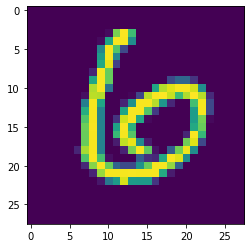

9


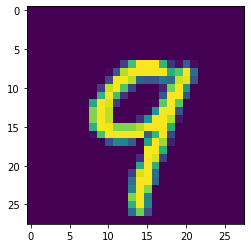

0


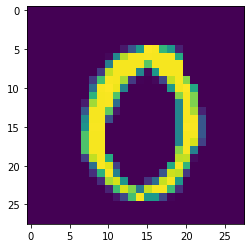

1


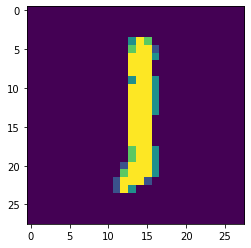

5


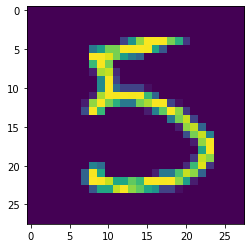

9


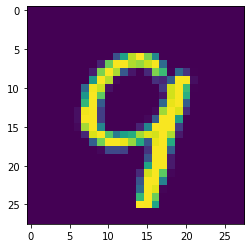

7


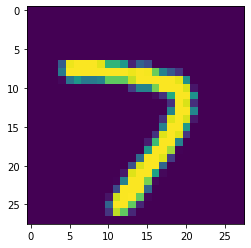

3


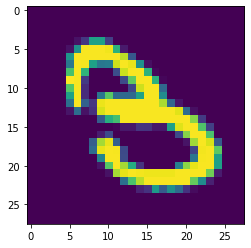

4


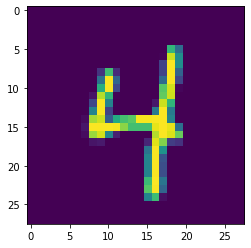

In [ ]:
for i in range(20):
    print(y_test[i])
    plt.imshow(x_test[i])
    plt.show()

## Przykład autoencodera

In [ ]:
from tensorflow.keras import Model, utils
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Conv2D, UpSampling2D, MaxPooling2D, Conv2DTranspose, LeakyReLU
import numpy as np

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train)
print(y_train)

In [ ]:
inputs = Input((28,28,1))

encoded_3 = Conv2D(10,(5,5),activation="relu")(inputs)
encoded_2 = MaxPooling2D(2,2)(encoded_3)
encoded_1 = Conv2D(20,(2,2),activation="relu")(encoded_2)
encoded = MaxPooling2D((2,2))(encoded_1)

decoded_4 = UpSampling2D((2,2))(encoded)
decoded_3 = Conv2DTranspose(20,(2,2),activation="relu")(decoded_4)
decoded_2 = UpSampling2D((2,2))(decoded_3)
decoded_1 = Conv2DTranspose(10,(5,5),activation="sigmoid")(decoded_2)
decoded = Conv2DTranspose(1,(3,3),activation="sigmoid")(decoded_1)

auto_encoder = Model(inputs, decoded)
auto_encoder.compile()
auto_encoder.summary()

auto_encoder.compile(loss="binary_crossentropy",optimizer='adam',metrics=None)

In [ ]:
encoder = Model(inputs, encoded)
encoder.summary()
utils.plot_model(encoder, show_shapes=True, dpi=200)

# Wytrenuj model używając jedynie danych wejściowych, wyjście modelu równa się jego wejściu.

In [ ]:
auto_encoder.fit(x_train,x_train,batch_size=21,epochs=1,validation_data=(x_test,x_test))

encoder = Model(inputs, encoded)
encoded_imgs = encoder.predict(x_test)

2856/2858 [============================>.] - ETA: 0s - loss: 0.0735

# Zaprezentuj na danych testowych jak wyglądają dane wejściowe, dane zwrócone przez encoder i dane wyjściowe.

Image numer: 0
Before


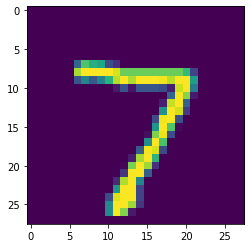

Encoded


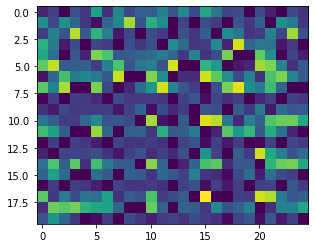

After


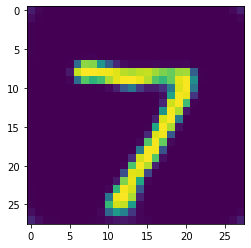





Image numer: 1
Before


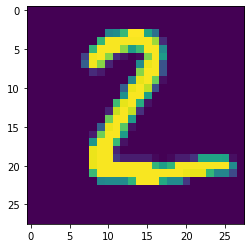

Encoded


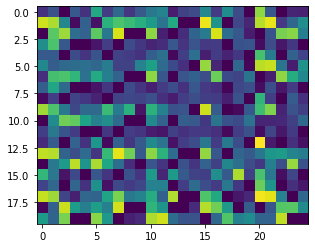

After


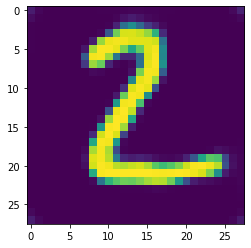





Image numer: 2
Before


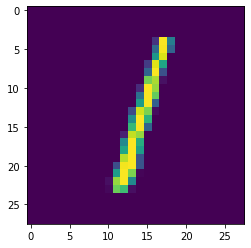

Encoded


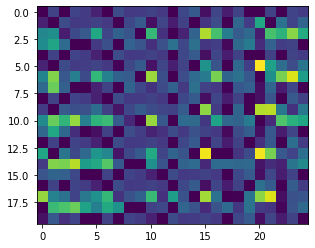

After


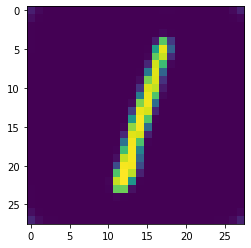





Image numer: 3
Before


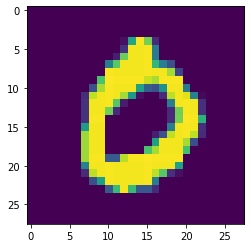

Encoded


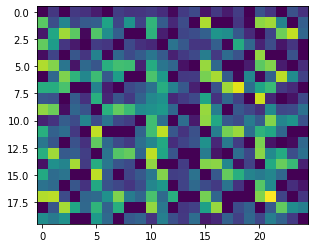

After


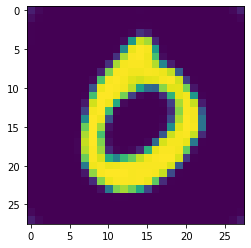





Image numer: 4
Before


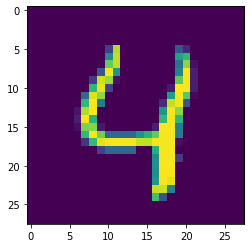

Encoded


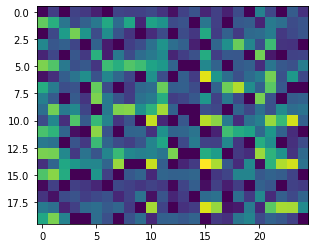

After


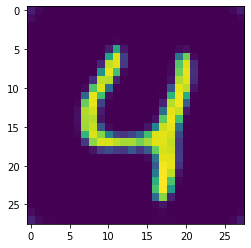

In [ ]:
for i in range(5):
  print("Image numer: "+str(i))
  print("Before")
  plt.imshow(x_test[i].reshape(28,28))
  plt.show()
  print("Encoded")
  plt.imshow(encoded_imgs[i].reshape(1,20,25,1).reshape(20,25))
  plt.show()
  print("After")
  result = auto_encoder.predict(x_test[i].reshape(1,28,28,1))
  plt.imshow(result.reshape(28,28))
  plt.show()
  print("\n\n\n")

# Odziel model encodera i sprawdź co oznaczają parametry wyjściowe. Czy obrazy zostały sklasyfikowane zgodnie z tym co pokazują?
